# IMPORT DIRECTORIES

In [4]:
import numpy as np
from PIL import Image
import os
import pandas as pd
from sklearn.metrics import roc_curve, auc,accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import warnings; warnings.simplefilter('ignore')

# IMPORT IMAGES FROM DEVICE 

In [5]:
path =r"C:\Users\kumar\Desktop\data"
data=[]
classes=[]
for cls in os.listdir(path):
    path_=os.path.join(path,cls)
    for i in  os.listdir(path_):
        data.extend([os.path.join(path,cls,i)])
        classes.extend([cls])

In [6]:
Data=pd.DataFrame({"data":data,"classes":classes})
Data.head()

,data,classes
0,C:\Users\kumar\Desktop\data\without_mask\witho...,without_mask
1,C:\Users\kumar\Desktop\data\without_mask\witho...,without_mask
2,C:\Users\kumar\Desktop\data\without_mask\witho...,without_mask
3,C:\Users\kumar\Desktop\data\without_mask\witho...,without_mask
4,C:\Users\kumar\Desktop\data\without_mask\witho...,without_mask


In [7]:
Data = Data.sample(frac=1)

In [8]:
Data.shape

(7553, 2)

In [9]:
Data = Data.reset_index(drop = True )
Data.head()

,data,classes
0,C:\Users\kumar\Desktop\data\with_mask\with_mas...,with_mask
1,C:\Users\kumar\Desktop\data\without_mask\witho...,without_mask
2,C:\Users\kumar\Desktop\data\with_mask\with_mas...,with_mask
3,C:\Users\kumar\Desktop\data\without_mask\witho...,without_mask
4,C:\Users\kumar\Desktop\data\without_mask\witho...,without_mask


# PRE-PROCESSING (CONVERTING IMAGES INTO VECTORS)

In [10]:
Sample_data= Data.drop([i for i in range(6053)])

In [11]:
Sample_data = Sample_data.reset_index()

In [12]:
Sample_data.head()

,index,data,classes
0,6053,C:\Users\kumar\Desktop\data\with_mask\with_mas...,with_mask
1,6054,C:\Users\kumar\Desktop\data\with_mask\with_mas...,with_mask
2,6055,C:\Users\kumar\Desktop\data\without_mask\witho...,without_mask
3,6056,C:\Users\kumar\Desktop\data\without_mask\witho...,without_mask
4,6057,C:\Users\kumar\Desktop\data\without_mask\witho...,without_mask


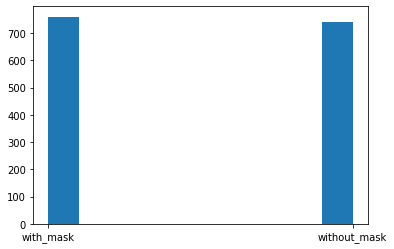

In [13]:
plt.hist(Sample_data.classes)
plt.show()

In [14]:
img1 = Image.open(Sample_data['data'][0])
img2 = Image.open(Sample_data['data'][999])

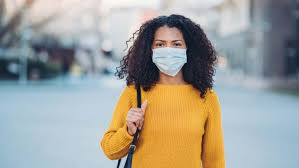

In [15]:
img1

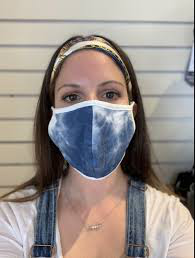

In [16]:
img2

In [17]:
Vectors = list()
for i in range(len(Sample_data)):
    img = Image.open(Sample_data['data'][i])
    img = img.resize((50,50),Image.ANTIALIAS)
    vec = np.array(img).ravel()
    Vectors.append(vec)

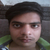

NO MASK 


In [18]:
for i in range(1000):
    if (len(Vectors[i])!=7500 ): print(i) ; Vectors[i] = Vectors[i-1]

In [19]:
df = pd.DataFrame(Vectors,columns =[i for i in range(7500)])

In [20]:
label = list()
for i in range(1500):
    if (Sample_data['classes'][i] == 'with_mask' ) : label.append(1) 
    else : Sample_data['classes'][i] = label.append(0)

In [21]:
df[7500] = label

In [22]:
df

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500
0,164,148,137,223,210,200,226,208,208,232,...,162.0,189.0,208.0,159.0,187.0,205.0,154.0,186.0,205.0,1
1,252,252,252,252,252,252,252,252,252,252,...,236.0,188.0,157.0,250.0,207.0,166.0,158.0,130.0,111.0,1
2,253,172,167,253,159,155,251,157,158,253,...,173.0,78.0,44.0,185.0,84.0,47.0,194.0,95.0,49.0,0
3,225,229,232,235,239,242,186,190,193,84,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,250.0,0
4,56,59,57,56,57,58,53,55,58,52,...,133.0,130.0,125.0,132.0,133.0,131.0,128.0,136.0,137.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6,8,7,4,6,5,4,6,5,8,...,2.0,6.0,6.0,3.0,6.0,4.0,3.0,5.0,2.0,0
1496,113,112,114,118,118,120,119,119,120,121,...,87.0,87.0,89.0,76.0,76.0,78.0,51.0,51.0,53.0,0
1497,0,0,3,1,1,3,1,1,4,1,...,227.0,227.0,229.0,178.0,178.0,179.0,83.0,83.0,83.0,0
1498,224,211,205,244,189,180,252,184,169,254,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1


In [23]:
np.all(np.isfinite(df))
np.any(np.isnan(df))

True

In [24]:
df = df.dropna()

In [25]:
X = df.iloc[:,0:7500].values
y = df.iloc[:,7500].values

# NORMALIZATION OF DATA 

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_trans = scaler.transform(X)

In [27]:
y = y.ravel()
y

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

# SPLIT  DATA

In [28]:
x_train , x_test ,y_train ,  y_test = train_test_split( X_trans,y, test_size=0.5, random_state=75) 

# LOGISTIC REGRESSION MODEL 

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(x_train,y_train)

In [30]:
#Accuracy using regression
print('Accuracy of logistic regression model : ',lr.score(x_test,y_test)*100,'%')

Accuracy of logistic regression model :  84.66666666666667 %


In [31]:
print("Cross Validaion scores : ",cross_val_score(lr, x_test, y_test, cv=3))

Cross Validaion scores :  [0.848 0.788 0.832]


In [32]:
print('Confusion Matrix ','\n',confusion_matrix( y_test,lr.predict(x_test)))

Confusion Matrix  
 [[337  38]
 [ 77 298]]


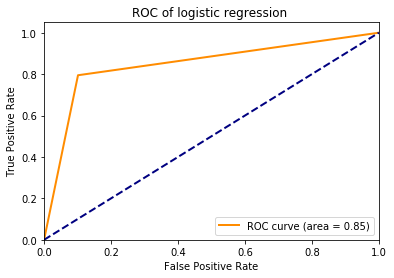

In [33]:
fpr,tpr,_= roc_curve(y_test,lr.predict(x_test))
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of logistic regression ')
plt.legend(loc="lower right")
plt.show()

# DIMENSION REDUCTION USING PCA

In [34]:

from sklearn.decomposition import PCA
pca = PCA(0.88)
pca.fit(x_train)


PCA(copy=True, iterated_power='auto', n_components=0.88, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
pca_x_train = pca.transform(x_train)
pca_x_test  = pca.transform(x_test)

In [36]:
pca_lr = LogisticRegression(random_state=0).fit(pca_x_train, y_train)

In [37]:
print('Shape of data before and after PCA :',x_test.shape ,'<===>',pca_x_test.shape)

Shape of data before and after PCA : (750, 7500) <===> (750, 76)


In [38]:
print('Accuracy of Linear regression model After PCA : ',pca_lr.score(pca_x_test,y_test)*100,'%')
print("Cross Validaion scores after PCA : ",cross_val_score(pca_lr, pca_x_test, y_test, cv=3))
print('Confusion Matrix ','\n',confusion_matrix( y_test,pca_lr.predict(pca_x_test)))

Accuracy of Linear regression model After PCA :  85.06666666666666 %
Cross Validaion scores after PCA :  [0.84  0.808 0.836]
Confusion Matrix  
 [[328  47]
 [ 65 310]]


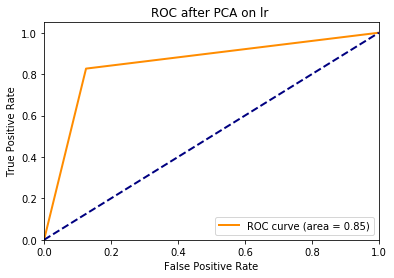

In [39]:
fpr,tpr,_= roc_curve(y_test,pca_lr.predict(pca_x_test))
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC after PCA on lr ')
plt.legend(loc="lower right")
plt.show()

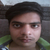

In [53]:
vivek = Image.open(r'C:\Users\kumar\Downloads\vivek.jpeg')
vivek= vivek.resize((50,50),Image.ANTIALIAS)

vec = np.array(vivek).ravel().reshape(1,-1)
vivek

In [54]:
if (lr.predict(vec2) == 0) : print('NO MASK ')
else : print('YES')

NO MASK 
